<a href="https://colab.research.google.com/github/radhakrishnan-omotec/arwan-iris-dog-repo/blob/main/3_Part3_Dog_classification_project7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dog Bark Analysis  -Breed based - Part3

Automated Dog Breed Classification
Using Machine Learning for Breed-Specific Analysis

### Arwan Makhija

In [ ]:
!git clone https://github.com/radhakrishnan-omotec/arwan-iris-dog-repo.git

Cloning into 'arwan-iris-dog-repo'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 44 (delta 21), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (44/44), 9.53 MiB | 9.37 MiB/s, done.
Resolving deltas: 100% (21/21), done.


##Download and explore the dataset

In [ ]:
# STEP 1: Connect to the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# STEP 2: Load the folder in the connected Google Drive
import os

# Change this path to the folder you want to analyze
folder_path = '/content/drive/MyDrive/1.ALL-RESEARCH/0-IRIS-ARWAN/EMOTION_BARK_DATASET'


# Check if the folder exists
if not os.path.exists(folder_path):
    raise Exception(f"The folder {folder_path} does not exist. Please check the path.")
else:
    print("Folder Loaded Successfully")


Folder Loaded Successfully


In [ ]:
# STEP 3: Count of Audio files Loaded in the folder in the connected Google Drive
import pathlib
# Define the directory path
data_dir = pathlib.Path('/content/drive/MyDrive/1.ALL-RESEARCH/0-IRIS-ARWAN/EMOTION_BARK_DATASET')
# Specify the audio file extensions to look for
audio_extensions = {'.wav'}
# Use pathlib to find all audio files in the directory and subdirectories
audio_files = [f for f in data_dir.rglob('*') if f.suffix.lower() in audio_extensions]
# Count the number of audio files
num_audio = len(audio_files)
print(f"Number of audio: {num_audio}")

Number of audio: 11


## Loading the CSV File

In [ ]:
import pandas as pd
import numpy as np
import os, librosa
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
print("Imports Loaded")

Imports Loaded


In [ ]:
# Visualization
import IPython.display as ipd
import matplotlib.pyplot as plt
import seaborn as sns

# Model
from tensorflow import keras
from keras.utils import to_categorical
from keras import layers, Sequential
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Metrics
from sklearn.metrics import confusion_matrix
print("All Imports Loaded")

All Imports Loaded


In [ ]:
import pandas as pd
import numpy as np
import os, librosa
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Visualization
import IPython.display as ipd
import matplotlib.pyplot as plt
import seaborn as sns

# Model
from tensorflow import keras
from keras.utils import to_categorical
from keras import layers, Sequential
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Metrics
from sklearn.metrics import confusion_matrix

# Suppressing warnings
from warnings import filterwarnings
filterwarnings('ignore')
print("Complete Imports Loaded")

Complete Imports Loaded


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/1.ALL-RESEARCH/0-IRIS-ARWAN/dog_audio_test.csv')
audioPath = ('/content/drive/MyDrive/1.ALL-RESEARCH/0-IRIS-ARWAN/')
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,1,dog_emotion_aggression
1,100652-3-0-0.wav,100652,0.0,4.000000,1,2,1,dog_emotion_aggression
2,100652-3-0-1.wav,100652,0.5,4.500000,1,2,1,dog_emotion_aggression
3,100652-3-0-2.wav,100652,1.0,5.000000,1,2,1,dog_emotion_aggression
4,100652-3-0-3.wav,100652,1.5,5.500000,1,2,1,dog_emotion_aggression


In [ ]:
data.tail()

,slice_file_name,fsID,start,end,salience,fold,classID,class
995,97193-3-0-4.wav,97193,2.000000,6.000000,1,2,5,dog_emotion_frustration
996,97193-3-0-6.wav,97193,3.000000,7.000000,1,2,5,dog_emotion_frustration
997,97392-3-0-0.wav,97392,0.000000,2.773946,1,6,5,dog_emotion_frustration
998,97756-3-0-0.wav,97756,0.141727,1.290466,1,10,5,dog_emotion_frustration
999,99185-3-0-0.wav,99185,0.341411,0.950911,1,5,5,dog_emotion_frustration


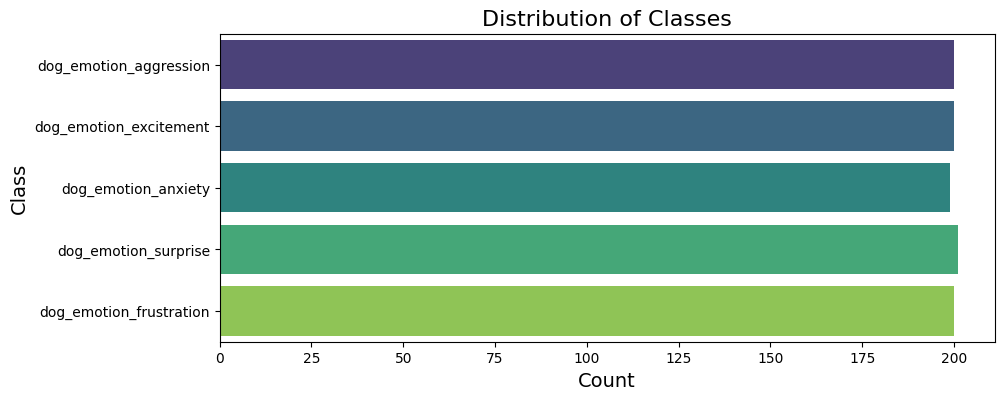

In [ ]:
plt.figure(figsize = (10, 4))
sns.countplot(y = data['class'], palette = 'viridis')
plt.title('Distribution of Classes', fontsize = 16)
plt.xlabel('Count', fontsize = 14)
plt.ylabel('Class', fontsize = 14)
plt.show()

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/1.ALL-RESEARCH/0-IRIS-ARWAN/dog_audio_test.csv')
audioPath = ('/content/drive/MyDrive/1.ALL-RESEARCH/0-IRIS-ARWAN/DATASET/')
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,1,dog_emotion_aggression
1,100652-3-0-0.wav,100652,0.0,4.000000,1,2,1,dog_emotion_aggression
2,100652-3-0-1.wav,100652,0.5,4.500000,1,2,1,dog_emotion_aggression
3,100652-3-0-2.wav,100652,1.0,5.000000,1,2,1,dog_emotion_aggression
4,100652-3-0-3.wav,100652,1.5,5.500000,1,2,1,dog_emotion_aggression


Class : dog_emotion_frustration



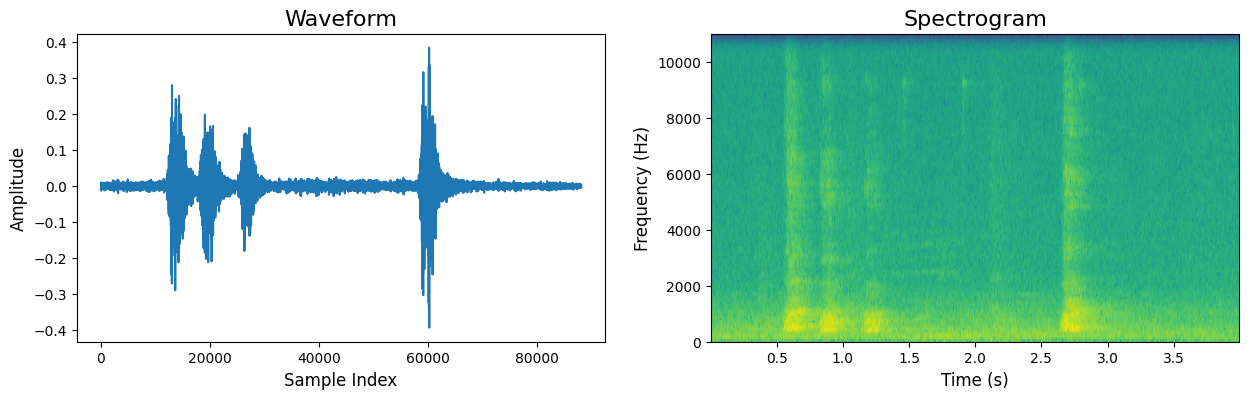

In [ ]:
# Displaying a random waveform and spectrogram

# Randomly selecting a row
row = data.sample(1).iloc[0]

# Constructing file path
audioFile = os.path.join(audioPath, 'fold' + str(row['fold']), row['slice_file_name'])

# Loading audio file
waveform, sampleRate = librosa.load(audioFile)

# Displaying audio
print(f"Class : {row['class']}\n")
ipd.display(ipd.Audio(waveform, rate = sampleRate))

# Displaying waveform
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
plt.plot(waveform)
plt.title('Waveform', fontsize = 16)
plt.xlabel('Sample Index', fontsize = 12)
plt.ylabel('Amplitude', fontsize = 12)

# Displaying spectrogram
plt.subplot(1, 2, 2)
plt.specgram(waveform, Fs = sampleRate)
plt.title('Spectrogram', fontsize = 16)
plt.xlabel('Time (s)', fontsize = 12)
plt.ylabel('Frequency (Hz)', fontsize = 12)

plt.show()

# Applying pre-emphasis, Time stretching, Adding noise

In [ ]:
def augmentData(waveform):
    # Applying pre-emphasis
    waveform = librosa.effects.preemphasis(waveform)

    # Time stretching
    if np.random.rand() < 0.5:
        rate = np.random.uniform(0.8, 1.2)
        waveform = librosa.effects.time_stretch(waveform, rate = rate)

    # Adding noise
    waveform += 0.01 * np.random.normal(size = waveform.shape)

    return waveform

# Loading audio file
### waveform = augmentData(waveform)

In [ ]:
def mfccExtract(file):
    # Loading audio file
    waveform, sampleRate = librosa.load(file)

    # waveform = augmentData(waveform)
    features = librosa.feature.mfcc(y = waveform, sr = sampleRate, n_mfcc = 64)
    return np.mean(features, axis = 1)

# Storing mfcc features along with classes in dataframe

# Iterating through each row

# Extracting features and appending them

In [ ]:
# Storing mfcc features along with classes in dataframe
extractAll = []

# Iterating through each row
for index, row in tqdm(data.iterrows()):
    # Constructing file path
    audioFile = os.path.join(audioPath, 'fold' + str(row['fold']), row['slice_file_name'])

    # Extracting features and appending them
    features = mfccExtract(audioFile)
    extractAll.append([features, row['class']])

1000it [07:41,  2.17it/s]


# Displaying  dataframe with mfcc features along with classes

In [ ]:
featuresDf = pd.DataFrame(extractAll, columns = ['Features', 'Class'])
featuresDf.head()

,Features,Class
0,"[-211.93698, 62.58121, -122.813156, -60.745293...",dog_emotion_aggression
1,"[-272.6298, 96.86443, -86.22162, -9.168317, 4....",dog_emotion_aggression
2,"[-291.95013, 100.77206, -94.797745, -11.993611...",dog_emotion_aggression
3,"[-300.3544, 102.79728, -90.32626, -12.500051, ...",dog_emotion_aggression
4,"[-298.82608, 103.67768, -94.644806, -13.064194...",dog_emotion_aggression


In [ ]:
featuresDf.tail()

,Features,Class
995,"[-262.18777, 107.99413, -34.709454, -27.140291...",dog_emotion_frustration
996,"[-309.7879, 102.254, -34.222477, -10.805519, 2...",dog_emotion_frustration
997,"[-339.63278, 79.483955, -67.856636, -47.53872,...",dog_emotion_frustration
998,"[-177.5328, 58.77204, -14.632337, -17.317049, ...",dog_emotion_frustration
999,"[-231.40384, 120.29054, -68.66497, -49.47114, ...",dog_emotion_frustration


# Converting features into numpy array

# Encoding classes

In [ ]:
# Converting features into numpy array
x = np.array(featuresDf['Features'].tolist())

# Encoding classes
encoder = LabelEncoder()
y = encoder.fit_transform(featuresDf['Class'])
y = to_categorical(y, num_classes = 10)

print("y =",y)

y = [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Splitting train & test

In [ ]:
trainX, testX, trainY, testY = train_test_split(x, y, stratify = y, random_state = 0)

In [ ]:
print("TRAIN X = ",trainX)

TRAIN X =  [[-1.20569283e+02  1.13610191e+02 -6.00030136e+01 ...  1.92369029e-01
  -1.00102258e+00 -1.24628626e-01]
 [-1.66743729e+02  2.11574509e+02 -1.11188583e+02 ... -8.05795491e-01
  -4.92796630e-01 -2.04085663e-01]
 [-4.38867096e+02  1.27667694e+02  1.10923166e+01 ... -8.45261157e-01
  -3.38104844e+00 -2.02808619e+00]
 ...
 [-1.53780609e+02  1.31899826e+02 -8.03931503e+01 ...  2.11169481e+00
   9.58196580e-01  6.42324209e-01]
 [-2.86406372e+02  8.60856171e+01 -3.79989433e+01 ...  4.43305826e+00
   2.03343481e-01 -2.04779339e+00]
 [-3.23997620e+02  8.23434143e+01 -2.20337448e+01 ...  3.20156574e-01
  -1.78821397e+00  9.46270704e-01]]


In [ ]:
print("TEST X = ",testX)

TEST X =  [[-1.99391754e+02  9.70528030e+01 -4.88970604e+01 ... -6.63469672e-01
  -1.00963080e+00 -9.93220091e-01]
 [-4.10568420e+02  1.33691849e+02 -3.36485553e+00 ... -2.05289483e+00
  -1.81268901e-01 -2.28821373e+00]
 [-2.02678543e+02  6.38717422e+01 -4.22326584e+01 ... -5.75870395e-01
  -1.13036714e-01 -1.34054041e-02]
 ...
 [-1.06617798e+02  8.71145935e+01 -7.86717529e+01 ... -5.47637761e-01
  -1.20717418e+00 -9.25064504e-01]
 [-5.19307327e+01  1.48929688e+02 -3.98234367e+01 ...  1.25308740e+00
  -1.47733200e+00  8.60778689e-01]
 [-4.16173004e+02  6.58824081e+01 -5.17707062e+01 ...  5.31964362e-01
  -5.78448057e-01  4.85401034e-01]]


In [ ]:
print("TRAIN Y = ",trainY)

TRAIN Y =  [[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
print("TEST Y = ",testY)

TEST Y =  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


# Model Creation

#Model Summary

In [ ]:
model = Sequential([
    layers.Dense(1024, activation = 'relu', input_shape = (64,)),
    layers.BatchNormalization(),

    layers.Dense(512, activation = 'relu'),
    layers.BatchNormalization(),

    layers.Dense(256, activation = 'relu'),
    layers.BatchNormalization(),

    layers.Dense(128, activation = 'relu'),
    layers.BatchNormalization(),

    layers.Dense(64, activation = 'relu'),
    layers.BatchNormalization(),

    layers.Dense(32, activation = 'relu'),
    layers.BatchNormalization(),

    layers.Dense(10, activation = 'softmax')
])

# Defining optimizer, loss function, and metrics
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1024)                │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 774,314 (2.95 MB)

 Trainable params: 770,282 (2.94 MB)

 Non-trainable params: 4,032 (15.75 KB)

# Adding early stopping to avoid overfitting

In [ ]:
# Adding early stopping to avoid overfitting
earlyStopping = EarlyStopping(
    monitor = 'val_accuracy',
    min_delta = 5e-4,
    patience = 5,
    restore_best_weights = True
)

# Adding a learning rate annealer

In [ ]:
# Adding a learning rate annealer
reduceLR = ReduceLROnPlateau(
    monitor = 'val_accuracy',
    factor = 0.5,
    patience = 3,
    min_lr = 1e-5
)

# Training the Model

In [ ]:
# Training model
history = model.fit(
    trainX, trainY,
    validation_data = (testX, testY),
    epochs = 50,
    callbacks = [earlyStopping, reduceLR]
)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8587 - loss: 0.5024 - val_accuracy: 0.6240 - val_loss: 1.3583 - learning_rate: 0.0010
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8818 - loss: 0.4335 - val_accuracy: 0.6000 - val_loss: 1.3673 - learning_rate: 0.0010
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8816 - loss: 0.3872 - val_accuracy: 0.6520 - val_loss: 1.0974 - learning_rate: 0.0010
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8613 - loss: 0.4470 - val_accuracy: 0.6200 - val_loss: 1.2763 - learning_rate: 0.0010
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8732 - loss: 0.4076 - val_accuracy: 0.6480 - val_loss: 1.3252 - learning_rate: 0.0010
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8901 - loss: 0.3664 - val_accuracy: 0.6280 - val_loss: 1.3051 - learning_rate: 0.0010
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9044 - loss: 0.3236 - val_acc

#Creating history Dataframe

In [ ]:
historyDf = pd.DataFrame(history.history)

In [ ]:
historyDf.head(22)

,accuracy,loss,val_accuracy,val_loss,learning_rate
0,0.844000,0.514812,0.624,1.358263,0.001000
1,0.862667,0.444418,0.600,1.367288,0.001000
2,0.869333,0.418824,0.652,1.097397,0.001000
3,0.844000,0.486036,0.620,1.276286,0.001000
4,0.856000,0.434063,0.648,1.325231,0.001000
5,0.868000,0.411893,0.628,1.305099,0.001000
6,0.896000,0.345411,0.704,1.147494,0.000500
7,0.937333,0.244813,0.688,1.052188,0.000500
8,0.932000,0.237332,0.684,1.022512,0.000500
9,0.950667,0.194454,0.752,0.914918,0.000500


from matplotlib import pyplot as plt
_df_15['accuracy'].plot(kind='hist', bins=20, title='accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16['loss'].plot(kind='hist', bins=20, title='loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['val_accuracy'].plot(kind='hist', bins=20, title='val_accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['val_loss'].plot(kind='hist', bins=20, title='val_loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='accuracy', y='loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='loss', y='val_accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='val_accuracy', y='val_loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='val_loss', y='learning_rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23['accuracy'].plot(kind='line', figsize=(8, 4), title='accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_24['loss'].plot(kind='line', figsize=(8, 4), title='loss')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_25['val_accuracy'].plot(kind='line', figsize=(8, 4), title='val_accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_26['val_loss'].plot(kind='line', figsize=(8, 4), title='val_loss')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
historyDf.tail()

,accuracy,loss,val_accuracy,val_loss,learning_rate
17,0.977333,0.103072,0.792,0.807319,0.000250
18,0.990667,0.074427,0.784,0.822374,0.000250
19,0.992000,0.062313,0.784,0.813352,0.000250
20,0.984000,0.082840,0.788,0.806307,0.000125
21,0.981333,0.092814,0.788,0.820100,0.000125


# Plotting training and validation loss

<Axes: >

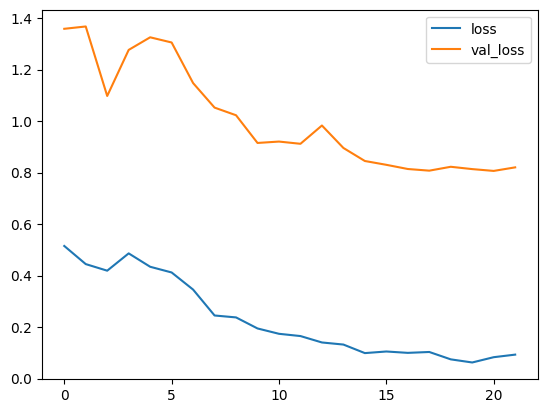

In [ ]:
# Plotting training and validation loss
historyDf.loc[:, ['loss', 'val_loss']].plot()

# Plotting training and validation accuracy

<Axes: >

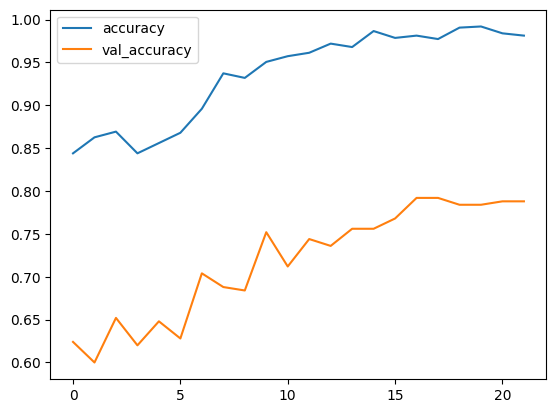

In [ ]:
# Plotting training and validation accuracy
historyDf.loc[:, ['accuracy', 'val_accuracy']].plot()

# Evaluating model

#Model Evaluation Score

In [ ]:
# Evaluating model
score = model.evaluate(testX, testY)[1] * 100
print(f'Validation accuracy of model : {score:.2f}%')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7830 - loss: 0.8173 
Validation accuracy of model : 79.20%


# Plotting confusion matrix

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


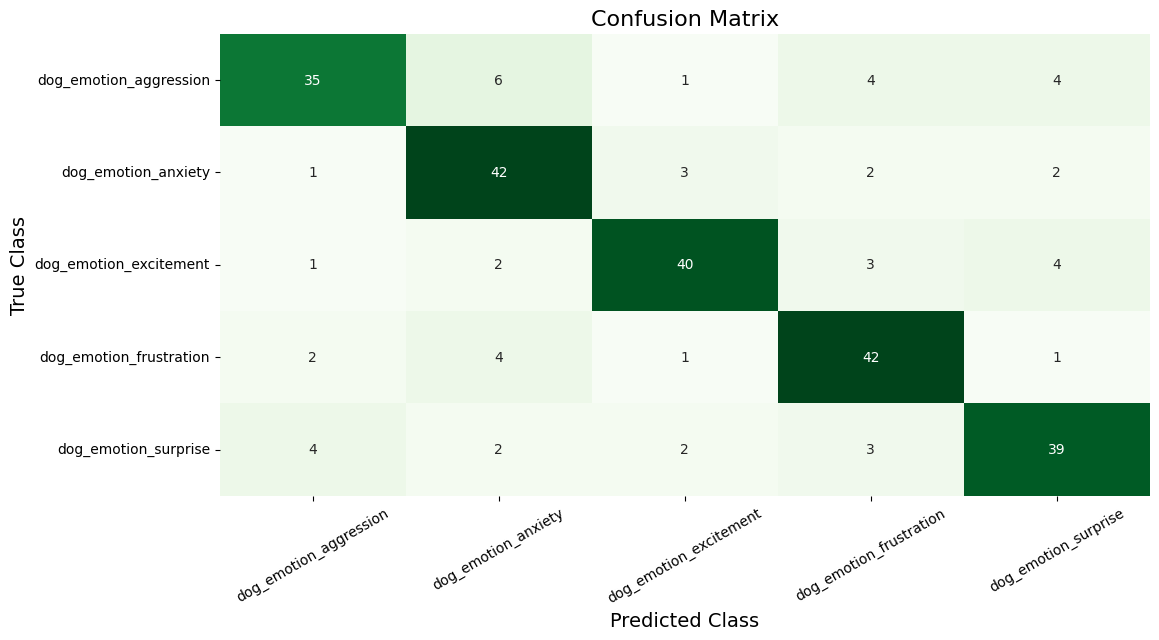

In [ ]:
# Plotting confusion matrix
pred = np.argmax(model.predict(testX), axis = 1)
true = np.argmax(testY, axis = 1)

matrix = confusion_matrix(true, pred)

plt.figure(figsize = (12, 6))
sns.heatmap(matrix, annot = True, cbar = False, fmt = 'd', cmap = 'Greens', xticklabels = encoder.classes_, yticklabels = encoder.classes_)
plt.title('Confusion Matrix', fontsize = 16)
plt.xlabel('Predicted Class', fontsize = 14)
plt.xticks(rotation = 30)
plt.ylabel('True Class', fontsize = 14)
plt.show()